# 预测机

一台基本的机器，可以进行思考，对输入给出输出作为答案：

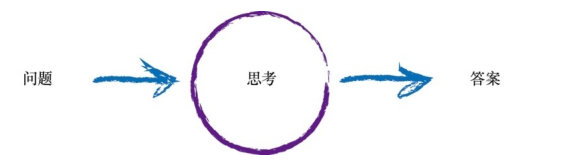

计算机其实并不思考：

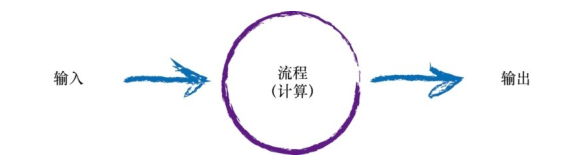

假设我们现在面领着这样的一个问题：

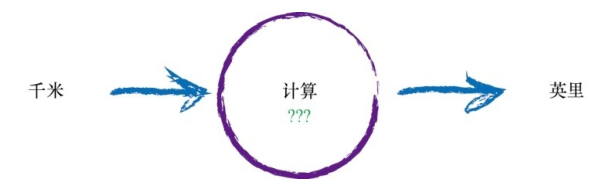

千米和英里之间的这种线性关系，它的形式应该是“英里=千米×C”，其中C为常数。

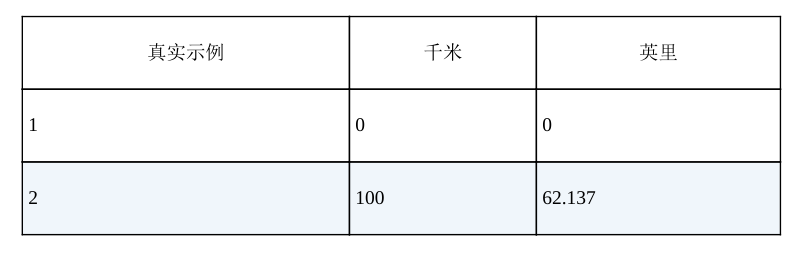

试着使用C=0.5：

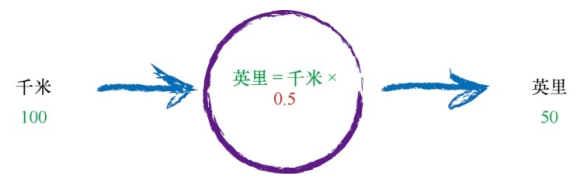

计算误差：

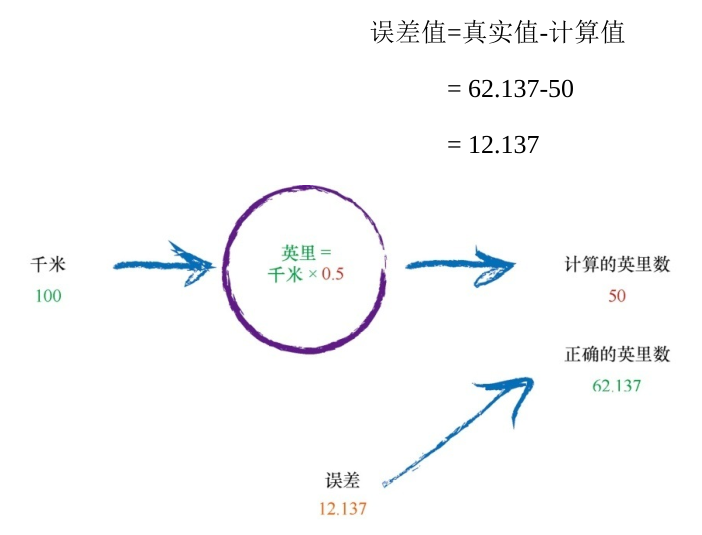

将C从0.5稍微增加到0.6：

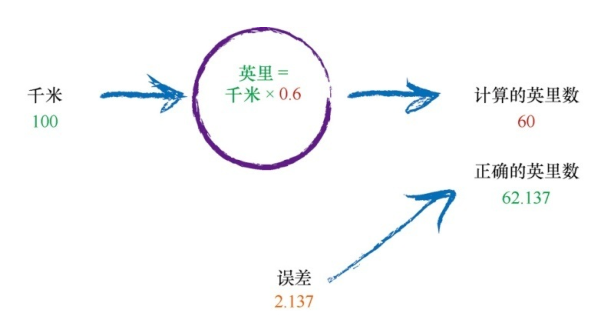

如果是0.7：

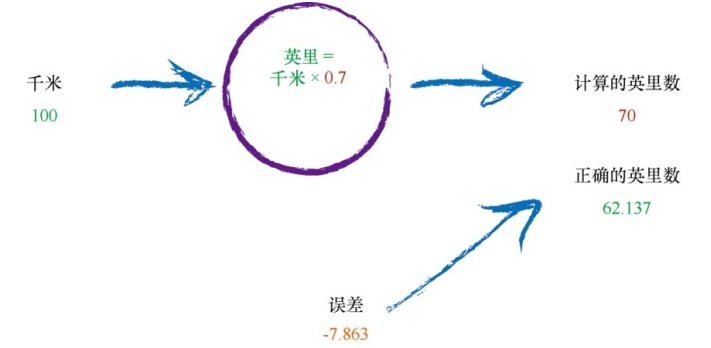

C=0.6比C=0.7好得多，微调C，将C从0.6调到0.61：

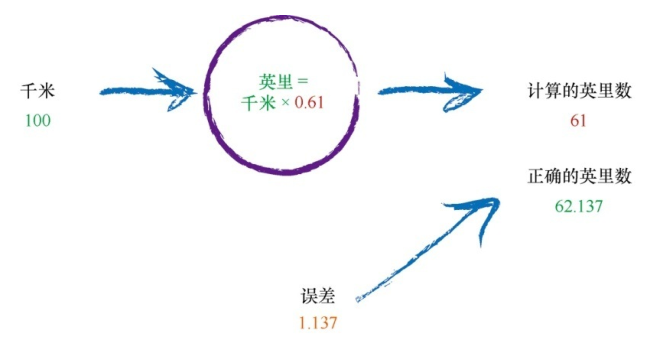

如果输出值越来越接近正确答案，即误差值越来越小，那么我们就不要做那么大的调整。使用这种方式，我们就可以避免像先前那样得到超调的结果。

# 分类器

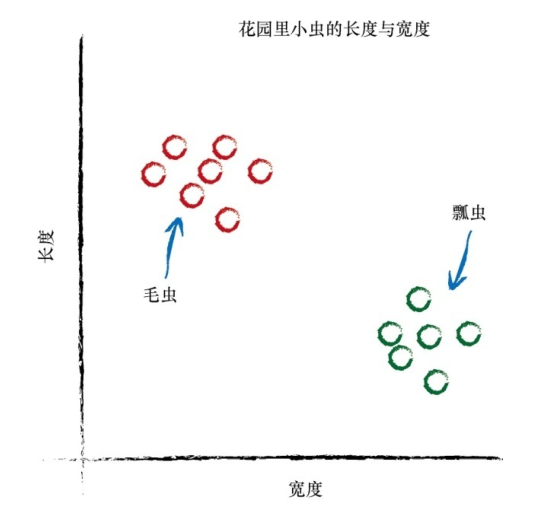

画上一条直线：

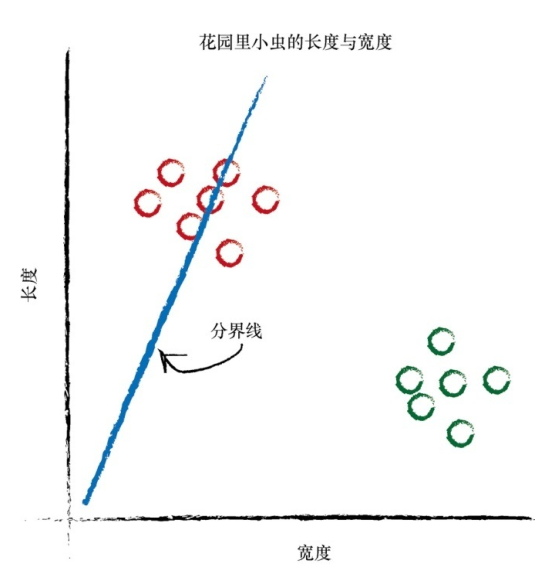

由于有一半的毛虫与瓢虫在分界线的
同一侧，因此上述的直线并没有做到这一点。

再次调整斜率，尝试不同的直线：

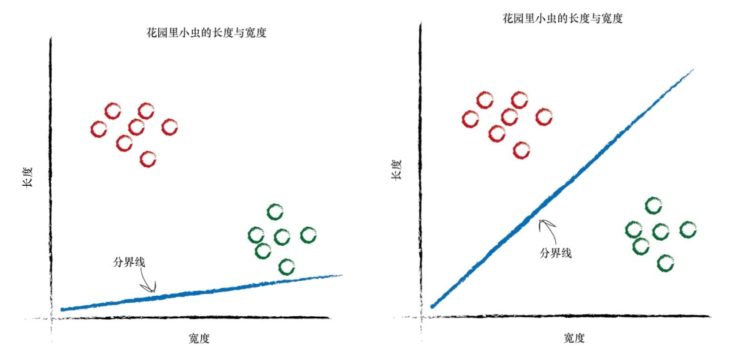

接着我们可以分类未知的小虫：

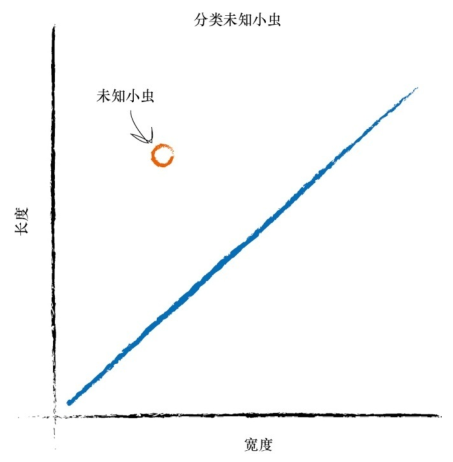

# 训练简单的分类器

希望训练线性分类器，使其能够正确分类瓢虫或毛虫。

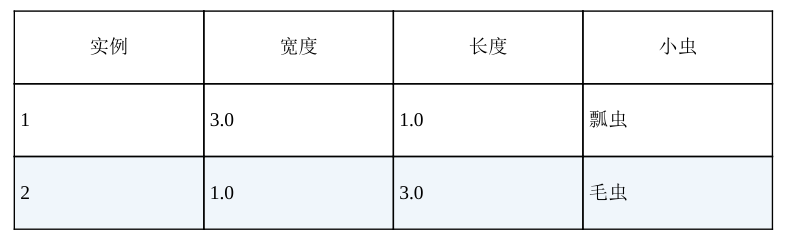

可视化：

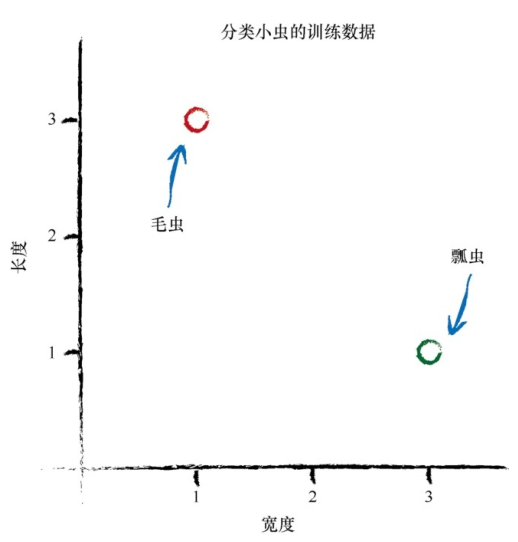

设置函数为：y=Ax

从A=0.25开始，分界线为y=0.25x：

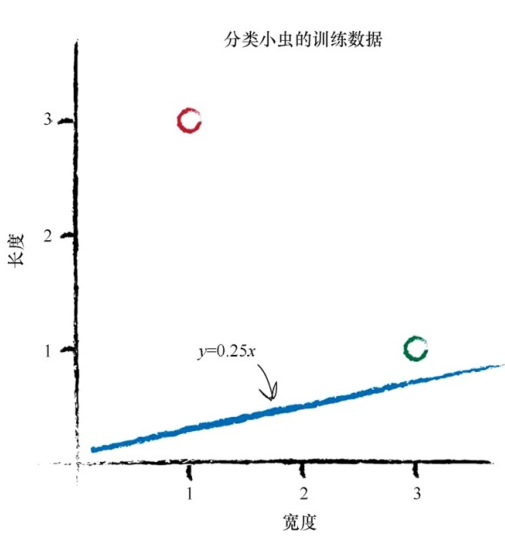

我们可以观察到直线y=0.25x不是一台很好的分类
器。这条直线未将两种类型的小虫区分开来。由于瓢虫也处在直线之上
因此我们不能说“如果小虫在直线之上，则这是一条毛虫”。

现在，我们有了一个误差值。正如先前将千米转换为英里的预测器实
例一样，我们可以利用这个误差值来搞清楚如何调整参数A。

误差值=（期望目标值-实际输出值）

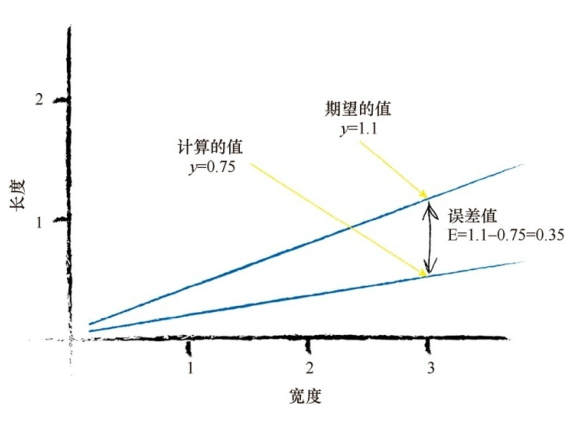

A的初始猜测值给出了错误的y值，y值应该等于训练数据给定的值。我们将正确的期望值t称为目标值。为了得到t值，我们需要稍微调整A的值。数学家使用增量符号Δ表示“微小的变化量”。

下面我们将这个变化量写出来：

t=(A+ΔA)x

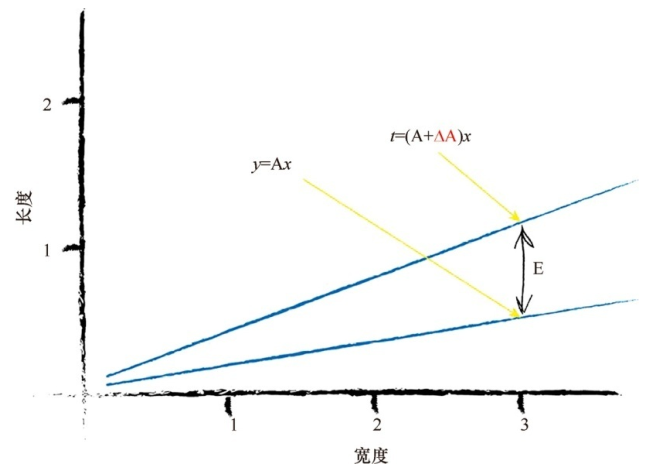

误差值E是期望的正确值与基于A的猜测值计算出来的值之间的差值。也就是说，E等于t-y。

得到的公式为：t-y=(A+ΔA)x-Ax

展开并且简化：

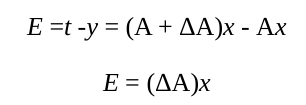

根据误差值E，我们希望知道需要将A调整多少，才能改进直线的斜率，得到一台更好的分类器。要做到这一点，我们只要重新调整上一个方程，将ΔA算出：

ΔA=E/x

得到的结果为：

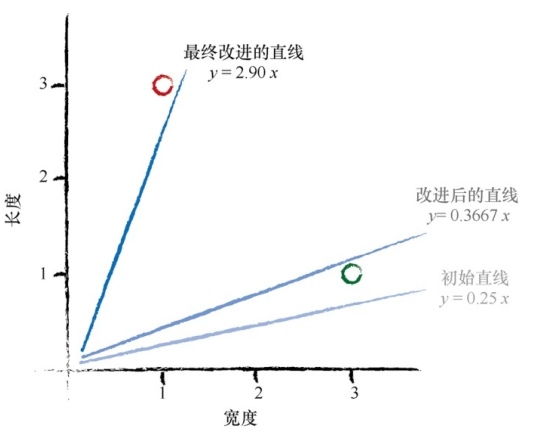

并没有做到让直线以
我们所希望的方式倾斜。这条直线没有整齐地划分出瓢虫和毛虫。

如果我们继续这样操作，使用各个训练数据
样本进行改进，那么我们所得到的是，最终改进的直线与最后一次训练
本非常匹配。

我们不要使改进过于激烈。我们采用ΔA几分之一的一个变化值，而不是采用整个ΔA，充满激情地跳跃到每一个新
的A值。使用这种方法，我们小心谨慎地向训练样本所指示的方向移动，保持先前训练迭代周期中所得到的值的一部分。在先前相对简单的千米转换为英里的预测器中，我们就已经观察到这种有节制的调整，我们小心翼翼地调整参数C，使其只是实际误差值的几分之几。

ΔA=L(E/x)

调节系数通常被称为学习率（learning rate），在此，我们称之为L。

我们就挑L=0.5作为一个合理的系数开始学习过程。简单说来，这就意味
着我们只更新原更新值的一半。

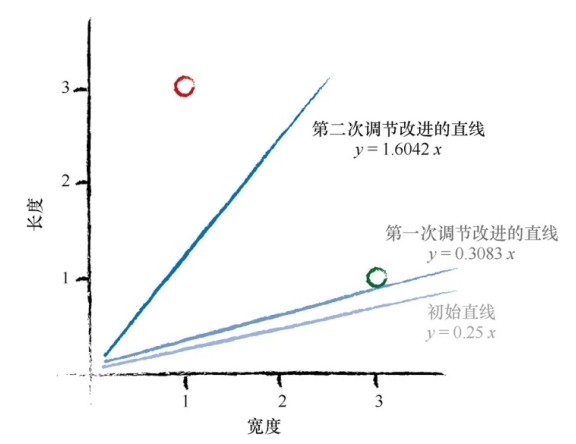

# 一个分类器不足以解决问题

有两个变量：

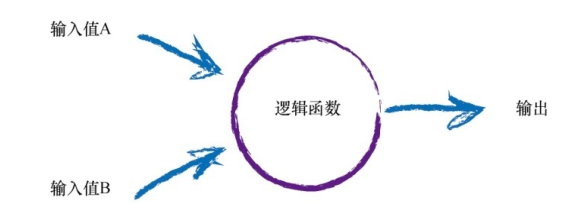

得到的结果：

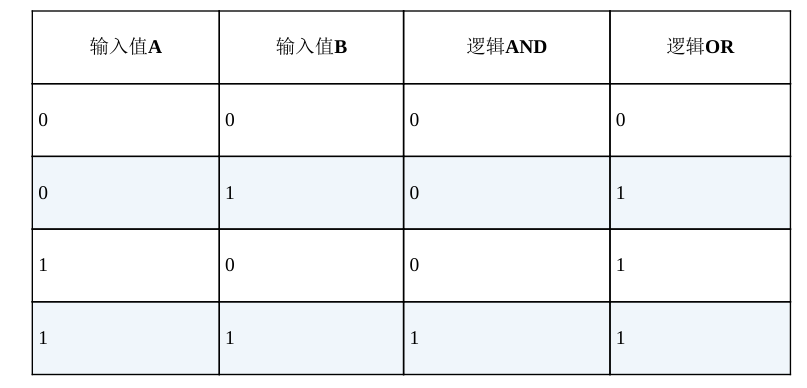

分类器：

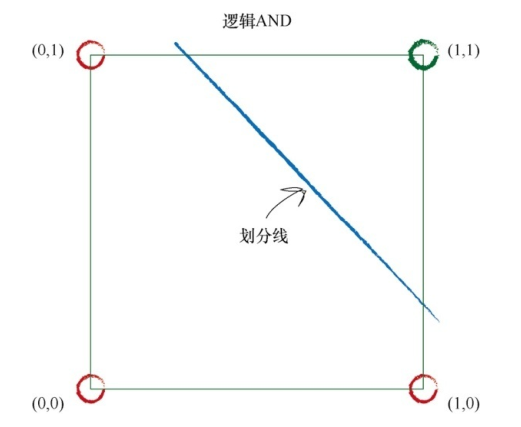 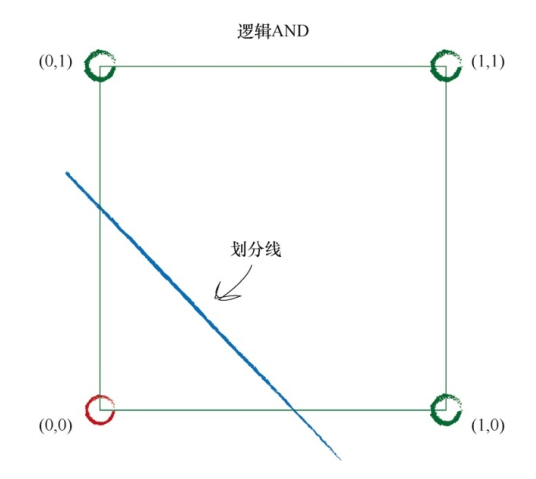

XOR（Exclusive OR）问题是指对两个输入进行逻辑运算时的一个特定情况。在逻辑运算中，如果两个输入都相同，则结果为0；如果两个输入不同，则结果为1。因此，XOR问题的特点是当输入的两个值相同时输出为0，当输入的两个值不同时输出为1。

在机器学习领域，XOR问题通常被用来说明线性模型的局限性。因为XOR问题无法通过简单的线性模型解决，它需要非线性的模型才能较好地进行分类。这使得XOR问题成为了一种经典的测试用例，来验证模型的非线性拟合能力

使用线性分类器进行划分：

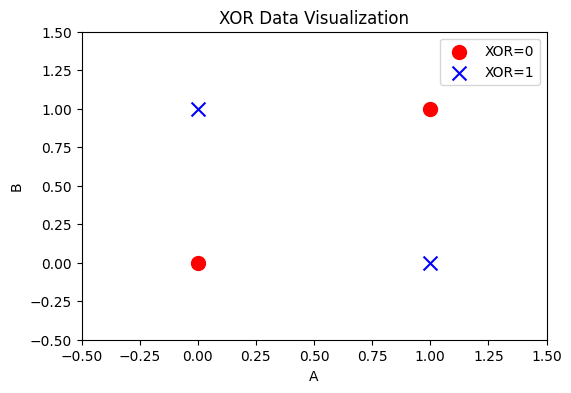

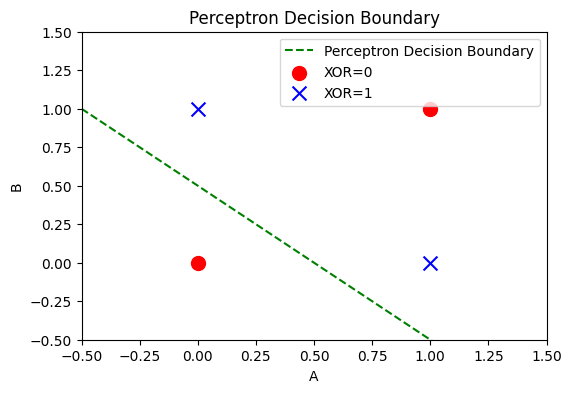

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

# data
A = [0, 0, 1, 1]
B = [0, 1, 0, 1]
XOR = [0, 1, 1, 0]

# Extract data points whose XOR is 0 and 1 respectively
x0, y0, x1, y1 = [], [], [], []
for i in range(len(XOR)):
     if XOR[i] == 0:
         x0.append(A[i])
         y0.append(B[i])
     else:
         x1.append(A[i])
         y1.append(B[i])

#Set canvas size and range
plt.figure(figsize=(6, 4))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Draw visualization of XOR data
plt.scatter(x0, y0, c='red', label='XOR=0', marker='o', s=100)
plt.scatter(x1, y1, c='blue', label='XOR=1', marker='x', s=100)
plt.xlabel('A')
plt.ylabel('B')
plt.title('XOR Data Visualization')
plt.legend(loc='upper right')
plt.show()

# Draw a visualization of a traditional perceptron
plt.figure(figsize=(6, 4))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
x_boundary = np.linspace(-0.5, 1.5, 100)
y_boundary = -x_boundary + 0.5 # Linear decision boundary of the perceptron
plt.plot(x_boundary, y_boundary, linestyle='--', color='green', label='Perceptron Decision Boundary')
plt.scatter(x0, y0, c='red', label='XOR=0', marker='o', s=100)
plt.scatter(x1, y1, c='blue', label='XOR=1', marker='x', s=100)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Perceptron Decision Boundary')
plt.legend(loc='upper right')
plt.show()

下图使用两条直线对不同的区域进行划分。这暗示了一种解决的办法，也就是说，我们可以使用多个分类器一起工作：

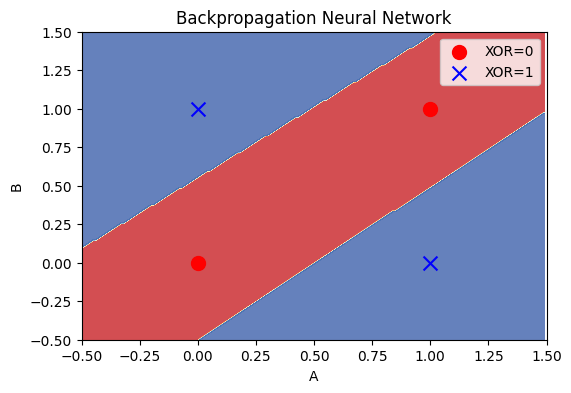

In [13]:
# Draw a visualization of the backpropagation neural network
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
model = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', solver='lbfgs', random_state=1)
model.fit(X, y)
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 4))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='XOR=0', marker='o', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='XOR=1', marker='x', s=100)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Backpropagation Neural Network')
plt.legend(loc='upper right')
plt.show()

# 神经元

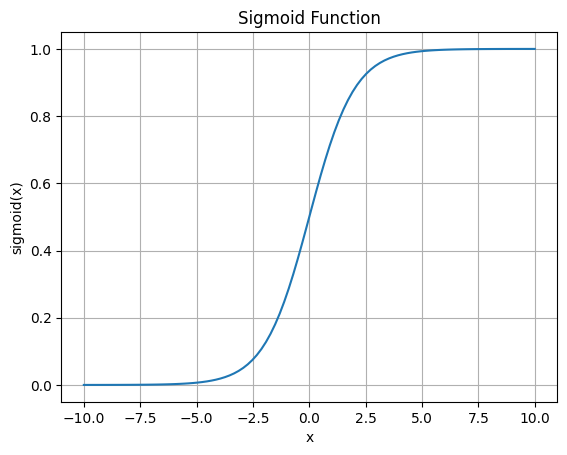

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 生成一组输入数据
x = np.linspace(-10, 10, 100)
# 计算对应的sigmoid函数输出
y = sigmoid(x)

# 绘制sigmoid函数的变化
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

神经网络的权重通常以矩阵的形式进行表示。矩阵中的每个元素对应着神经网络中的连接权重，而矩阵的行和列则对应着相邻层之间的神经元。

举个简单的例子，假设有一个包含3个输入神经元和2个输出神经元的神经网络。我们可以用一个矩阵来表示输入层和输出层之间的连接权重。假设这个神经网络的权重矩阵为：

\[ \begin{bmatrix} 
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} \\
\end{bmatrix} \]

在这个例子中，矩阵的每一行对应着输入神经元，每一列对应着输出神经元。所以，\(w_{ij}\) 表示输入神经元 i 到输出神经元 j 的连接权重。

当我们进行神经网络的前向传播计算时，可以使用这个权重矩阵来计算输出层的值，即 \( \mathbf{y} = \mathbf{W} \cdot \mathbf{x} \)，其中 \(\mathbf{y}\) 是输出层的值，\(\mathbf{W}\) 是权重矩阵，\(\mathbf{x}\) 是输入层的值。

这仅仅是一个简单的例子，实际中的神经网络可能会包含多个隐藏层和复杂的连接结构，但都可以通过类似的方式使用矩阵来表示权重。似的方式使用矩阵来表示权重。

# 斜率不连续

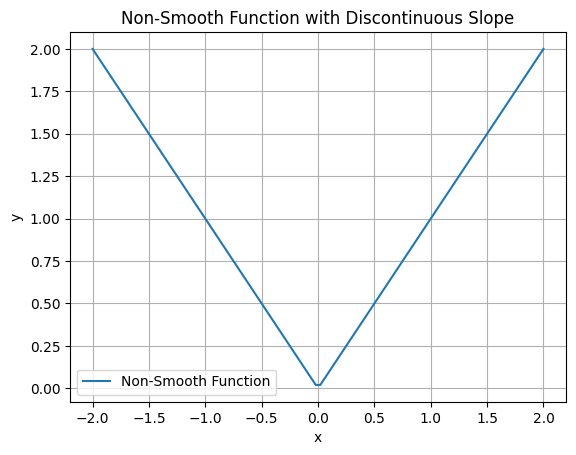

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义带有斜率不连续的函数
def non_smooth_function(x):
    return np.abs(x)

# 生成一系列x值
x = np.linspace(-2, 2, 100)
# 计算对应x值的y值
y = non_smooth_function(x)

# 绘制函数曲线
plt.figure()
plt.plot(x, y, label='Non-Smooth Function')
plt.title('Non-Smooth Function with Discontinuous Slope')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

当我们使用梯度下降方法寻找函数的最小值时，特别是在V形山谷附近，可能会出现斜率不连续的情况。这种情况通常发生在函数具有尖峰或者角点的地方。

一种常见的情况是当目标函数具有一个尖锐的转折点或者角点时，此时函数的斜率会出现不连续的情况。在这些点附近，梯度下降算法会出现摆动，因为梯度下降算法依赖于对斜率的计算，而此时的斜率无法提供准确的方向指引。

具体来说，当梯度下降算法接近函数中的尖锐转折点或者角点时，函数在该点的导数可能会变得很大，导致梯度下降算法在这些点附近来回震荡，而无法顺利收敛到最小值。

这种情况可能会导致梯度下降算法无法收敛，或者收敛速度非常缓慢，从而影响了算法的有效性。为了应对这种情况，可以尝试使用更复杂的优化算法，例如动量梯度下降、自适应学习率的优化算法（如Adam、RMSprop等），这些算法在处理复杂函数表现更优秀，能够更快速地收敛到最小值点。

另外，对于特定的函数，可能需要进行预处理或者调整学习率等超参数，以提高梯度下降算法在这些情况下的效果。

我们可以加上斜率的计算：

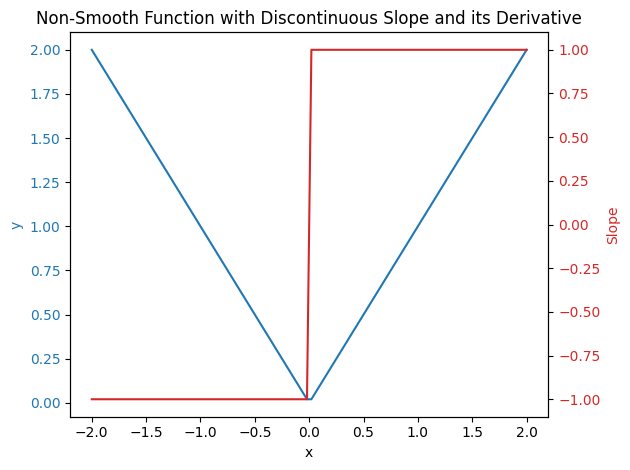

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义带有斜率不连续的函数
def non_smooth_function(x):
    return np.abs(x)

# 计算函数的斜率
def derivative(x):
    return np.sign(x)  # 符号函数的导数为正负1

# 生成一系列x值
x = np.linspace(-2, 2, 100)
# 计算对应x值的y值
y = non_smooth_function(x)
# 计算对应x值的斜率值
slope = derivative(x)

# 绘制函数曲线和斜率
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('x')
ax1.set_ylabel('y', color=color)
ax1.plot(x, y, label='Non-Smooth Function', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Slope', color=color)
ax2.plot(x, slope, label='Slope', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Non-Smooth Function with Discontinuous Slope and its Derivative')
fig.tight_layout()
plt.show()

上图可视化了斜率的变化，可以明显的发现，在x=0.0的时候斜率存在着断层。